# Image Classification with Convolutional Neural Networks

This lab will explore how we can use Convolutional Neural Networks (**_CNNs_**, for short) to improve our overall results for image classification. 

## Getting Started

We'll start by importing the **_MNIST_** data set and preprocessing it, just like we did before.

Run the cells below to import and preprocess the data.  Note that this time, we do **_not_** rehshape our data from matrices to vectors. This time, we want to leave images in matrix format!

In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_rows = 28
img_cols = 28
X_train = X_train.reshape(60000, img_rows, img_cols, 1)
X_test = X_test.reshape(10000, img_rows, img_cols, 1)

In [3]:
X_train = np.divide(X_train, 255.)
X_test = np.divide(X_test, 255.)

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Note that unlike the last notebook, we did not reshape our data into a vector.  Since we didn't, we need to make use of numpy's `.divide()` method in order to divide every number inside the matrix by 255.

## What is a Convolution?

A **_Convolution_** is when a filter is applied across every possible section of an image matrix in order to create a **_Feature Map_**.  Examine the diagram below to see if you can figure out exactly how this feature map is constructed.  

<img src='cnn_diagram.gif'>

Convolutional Neural Networks learn important image features, and pass them along as their output to the next layer. 

The typical structure of a CNN is:

<center>**_Convolutional Layer_** -> **_ReLU Activation_** -> **_MaxPooling Layer_**</center>

The **_Convolutional Layer_** learns a feature map for every **_filter_** the layer contains.  These filters are learned, just like the **_weights_** in the model!

The **_ReLU_** activation function turns any negative value to 0. 

<img src='relu-activation-function.png'>

The **_MaxPooling Layer_** reduces dimensionality by reducing a collection of pixels down to only the highest pixel value in that pool of pixels. 

<img src='maxpooling_diagram.gif'>


By combining these elements, a Convolutional Neural Network is quickly reduce dimensionality while still learning the important features that help it make correct classifications. 

## Building Our First CNN

Run the cell below to create a basic Convolutional Neural Network to classify the MNIST data set.  

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Structuring Our CNN

CNN models can usually be broken into 2 distinct sections:

* The **_Convolutional_** section, which uses filters to convolve feature maps with filters and reduce dimensionality with MaxPooling layers.
* The **_Feed Forward_** section, which contains 1 or more `Dense` layers that feed into an output layer.

Note that these sections except inputs that have fundamentally different shapes--`Conv2D` layers expect 2-dimensional matrices, while `Dense` layers expect 1-dimensional vectors. Thus, when moving from our Convolutional Section to our Feed-Forward section, we must first pass our data through a `Flatten()` layer, which just reshapes our data by flattening it into a 1D vector.  

Run the cell below to construct a CNN for classifying handwritten digits from the MNIST data set.  

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Let's take a look at a summary of the model. 

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total para

Note that this model has less than half of the trainable parameters of the Feed-Forward Neural Network we constructed in the previous notebook.  However, we'll see that this CNN will both outscore the previous model, and also take much longer to train. 

Run the cells below to compile and then fit the model.  

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [8]:
results = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 442us/step - loss: 0.1492 - acc: 0.9540 - val_loss: 0.0443 - val_acc: 0.9862
Epoch 2/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0343 - val_acc: 0.9890
Epoch 3/10
60000/60000 [==============================] - 27s 443us/step - loss: 0.0326 - acc: 0.9901 - val_loss: 0.0409 - val_acc: 0.9866
Epoch 4/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.0247 - acc: 0.9924 - val_loss: 0.0342 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0188 - acc: 0.9942 - val_loss: 0.0254 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 27s 443us/step - loss: 0.0154 - acc: 0.9949 - val_loss: 0.0331 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.

Let's visualize our results, as we did before.  Run the cells below to plot the model results at each epoch so we can examine how it did. 

In [9]:
history = results.history

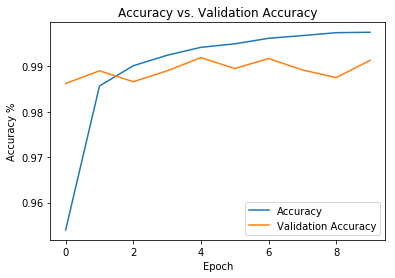

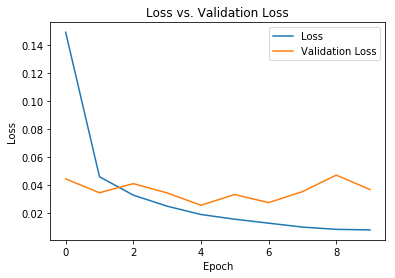

In [10]:
history = results.history
plt.figure()
plt.plot(history['acc'])
plt.plot(history['val_acc'])

plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy vs. Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.show()


plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.legend(["Loss", "Validation Loss"])
plt.title("Loss vs. Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Conclusion

When it comes to Image Classification, nothing comes even remotely close competely with Convolutional Neural Networks.  In just a few short lines of code in the lab, we built a model that was able classify handwritten digits with over 99% accuracy!